In [42]:
Pkg.add("Plots")
Pkg.clone("https://github.com/jmejia8/Metaheuristics.jl.git")
Pkg.clone("https://github.com/jmejia8/CEC17.jl.git")

INFO: Cloning CEC17 from https://github.com/jmejia8/CEC17.jl.git
INFO: Computing changes...
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /srv/julia/pkg/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /srv/julia/pkg/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /srv/julia/pkg/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /srv/julia/pkg/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stderr,Timer})() at ./event.jl:436
while loading In[42], in expression starting on line 3
INFO: No packages to install, update or remove


In [26]:
using Plots
using Metaheuristics
gr(size=(500, 500), dpi=500)


Plots.GRBackend()

## Ejemplo 1

Considere:
$$
f(x) = \sum_{i=1}^n x_i^2
$$

¿Qué propiedades tiene?

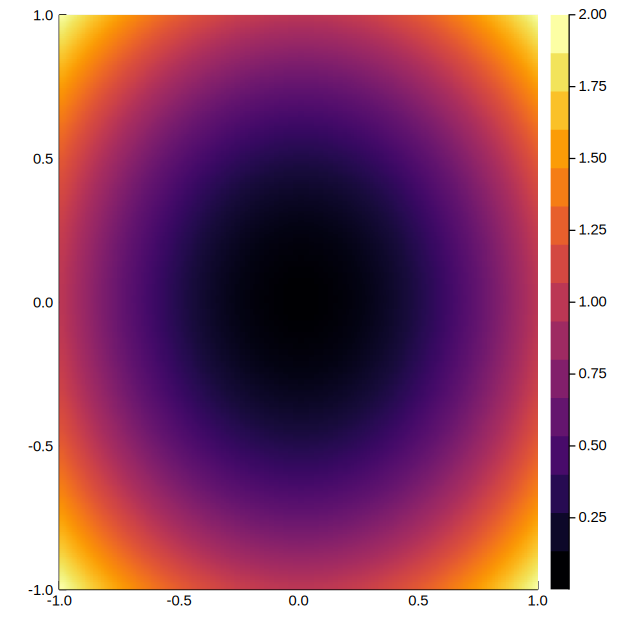

In [27]:
f(x⃗) = sum(x⃗.^2)

f(x, y) = f(Float64[x,y])

X = Y = linspace(-1, 1, 100)
contourf(X, Y, f)

## Ejemplo 2

Considere:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 + 10\cos(2\pi x_i)
$$
¿Qué propiedades tiene?

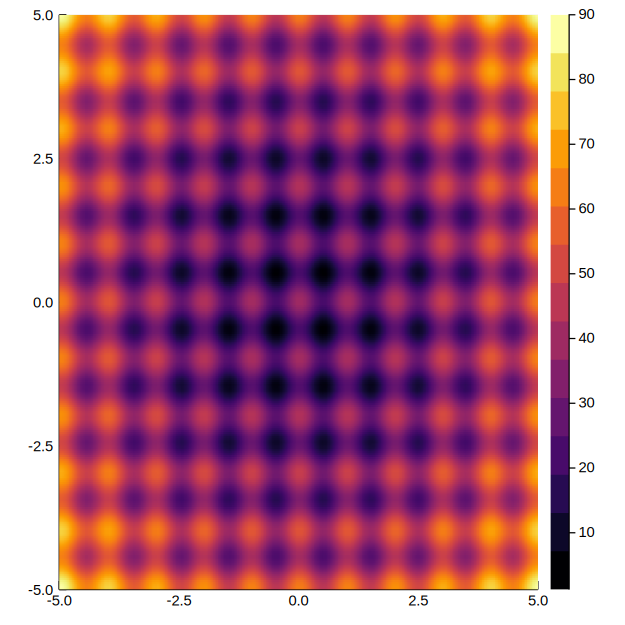

In [29]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 + 10cos.(2π*x⃗))

f(x, y) = f(Float64[x,y])

X = Y = linspace(-5, 5, 100)

contourf(X, Y, f)

## Minimizando Ejemplo 1

Minimizar usando ED:
$$
f(x) = \sum_{i=1}^n x_i^2,
$$
donde
$$
x\in [-5, 5]^n
$$

In [33]:
# función objetivo
f(x⃗) = sum(x⃗.^2)

limites = [
    -5  -5
     5  5.0
]

# dimensión del problema
n = size(limites, 2)

# optimizando con Evolución diferencial
x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([0.0, 0.0], 0.0)

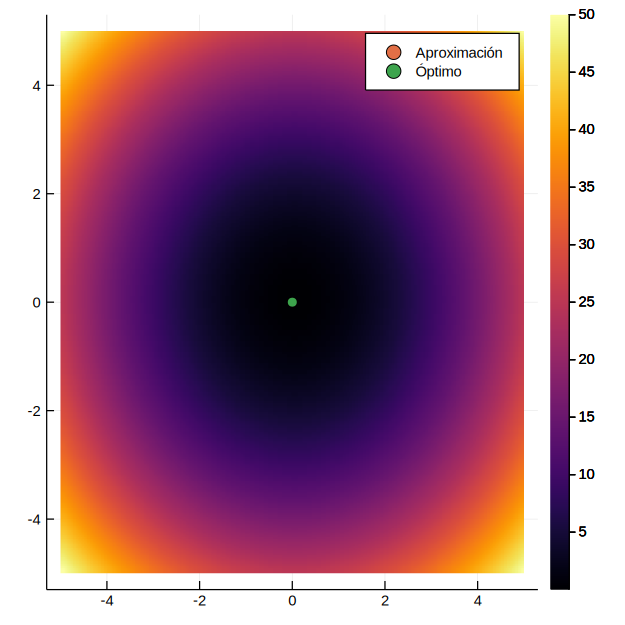

In [34]:
X = linspace(-5, 5, 100)
Y = linspace(-5, 5, 100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## Minimizando Ejemplo 2

Minimizar usando DE:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 + 10\cos(2\pi x_i)
$$
donde
$$
x\in [-5, 5]^n
$$

In [35]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

limites = [
    -5  -5
     5  5.0
]

n = size(limites, 2)

x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([2.93313e-10, 1.41562e-9], 0.0)

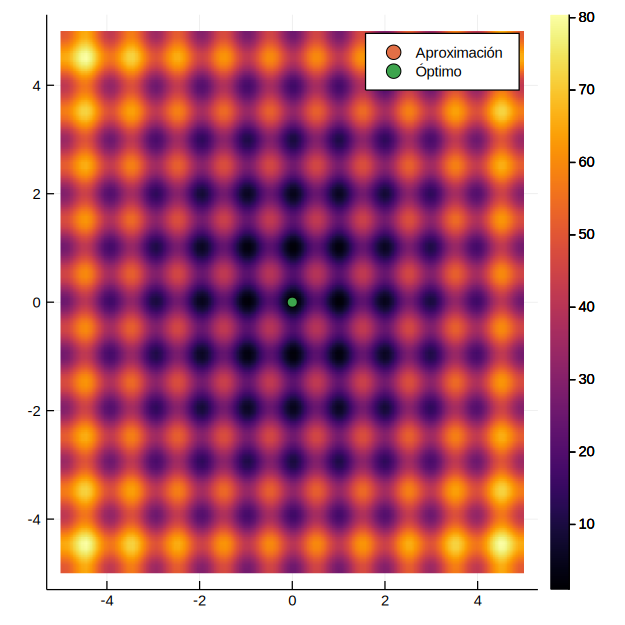

In [37]:
X = linspace(-5, 5, 100)
Y = linspace(-5, 5, 100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## PSO

In [39]:
f(x⃗) = sum(x⃗.^2)
n = 10

x, f_x = pso(f, n, limits = (-5.0, 5))

============[ PSO results ]============
| Generations = 1000
| Evals.      = 100100
| best sol.   = 1.1391473600570355e-14
| mean sol    = 0.018002827282366875
| std. sol    = 0.17965519434635865


([-2.08123e-8, 1.63418e-8, -2.61485e-8, 1.02391e-8, 1.57739e-8, 7.26328e-8, 4.22275e-8, -2.73454e-8, 8.6606e-9, 4.21e-8], 1.1391473600570355e-14)

## Problema de Caja-negra

El valor óptimo de esta función es 1000, es decir, $f(x^*)=1000$.

Considere $D = 2$.

In [43]:
using CEC17

f(x) = cec17_test_func(x, 10)

D = 2
x, f_x = DE(f, D)

X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación", color=:white)

LoadError: LoadError: [91mUndefVarError: Cvoid not defined[39m
while loading /srv/julia/pkg/v0.6/CEC17/src/CEC17.jl, in expression starting on line 25

### ¿Qué pasa con D=10, 30, 100? 

============[ ED results ]=============
| Generations = 999
| Evals       = 100000
| best sol.   = 0.04934495344693419


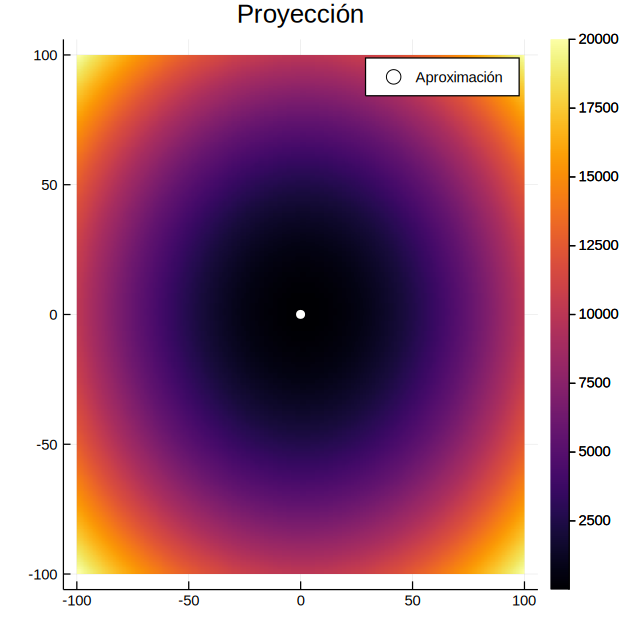

In [45]:
D = 10

x, f_x = DE(f, D)

X = linspace(-100, 100, 100)
Y = linspace(-100, 100, 100)

contourf(X, Y, f, title="Proyección")
scatter!([x[1]], [x[2]], label="Aproximación", color=:white)